Decay rate of emitter inside material
====================================

In this example, we demonstrate how the decay rate of quantum emitters embedded inside a multi-material nanostructure can be calculated.
To this end, we consider a dielectric nanostructure with a small hole in its center, which is filled with a lower index dielectric, that we consider to be doped with quantum emitters. 
We then calculate the spectral behavior of the average decay rate in the small inclusion.

Simulation setup
--------------------

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 1920/2048 dipoles valid


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:914: RuntimeWarning: divide by zero encountered in double_scalars
  all_distsum.append(np.sort(np.linalg.norm(geo - geo[idx_center], axis=1))[:10].sum() / step)
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:922: UserWarning: Mesh not detected, falling back to 'cubic'.
  warnings.warn("Mesh not detected, falling back to 'cubic'.")
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:688: UserWarning: Duplicate meshpoints found! Removed 128 duplicates.
  warnings.warn("Duplicate meshpoints found! Removed {} duplicates.".format(len(geo_duplicate)))
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


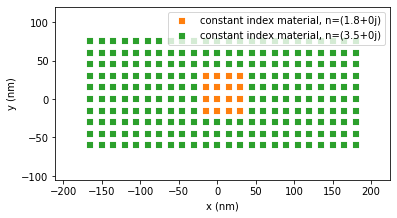

N dp 1920


In [1]:
from pyGDM2 import core
from pyGDM2 import fields
from pyGDM2 import structures
from pyGDM2 import propagators
from pyGDM2 import materials
from pyGDM2 import tools
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


# =============================================================================
# setup multi-material simulation
# =============================================================================
mesh = 'cube'

step = 15
## inner part - low index
geo1 = structures.rect_wire(step, L=4, H=8, W=4, mesh=mesh)
mat1 = [materials.dummy(1.8)] * len(geo1)

## outer part - high index
geo2 = structures.rect_wire(step, L=24, H=8, W=10, mesh=mesh)
mat2 = [materials.dummy(3.5)] * len(geo2)

## assemble geometries and materials
## - Note: the order of putting together the sub-parts here is important:
##         duplicate dipoles (all dipoles closer together than 'step') will be removed, 
##         only the first occurence will be kept. So we put geo1 first here.
geo = np.concatenate([geo1, geo2])
mat = np.concatenate([mat1, mat2])

struct = structures.struct(step, geo, mat)


## incident field
wavelengths = np.linspace(500, 950, 31)
field_generator = fields.plane_wave  # dummy config (will be ignored for LDOS)
kwargs = dict()                      # dummy config (will be ignored for LDOS)
efield = fields.efield(fields.dipole_electric, wavelengths=wavelengths, kwargs=kwargs)

## vacuum environment
dyads = propagators.DyadsQuasistatic123(n1=1)

## ---------- Simulation initialization
sim = core.simulation(struct, efield, dyads)

visu.structure(sim, scale=0.75)
print('N dp', len(sim.struct.geometry))

Decay rate simulation
----------------------------------------------

We calculate now the spectrum of the average decay rate enhancement inside the small low-index inclusion

In [2]:
## calc LDOS at all mesh-positions in 'geo1' part of the structure (--> low index inclusion)
r_probe = geo1

wl, E_decay_spec = tools.calculate_spectrum(sim, 0, core.decay_rate, r_probe=r_probe, component='e')
wl, H_decay_spec = tools.calculate_spectrum(sim, 0, core.decay_rate, r_probe=r_probe, component='h')

## plot the spectra
plt.plot(wl, np.mean(E_decay_spec[...,3], axis=(1,2))*1, label=r'ED')
plt.plot(wl, np.mean(H_decay_spec[...,3], axis=(1,2)), label='MD')
plt.xlabel('wavelength (nm)', fontsize=14)
plt.ylabel(r'volume-averaged $\Gamma / \Gamma_0$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

E-LDOS at wl=500.0nm - K: 4.3s, source-zone (128/128 pos): 0.0s, Done in 4.4s
E-LDOS at wl=515.0nm - K: 3.7s, source-zone (128/128 pos): 0.0s, Done in 3.8s
E-LDOS at wl=530.0nm - K: 3.6s, source-zone (128/128 pos): 0.0s, Done in 3.7s
E-LDOS at wl=545.0nm - K: 3.8s, source-zone (128/128 pos): 0.0s, Done in 3.8s
E-LDOS at wl=560.0nm - K: 3.8s, source-zone (128/128 pos): 0.0s, Done in 3.8s
E-LDOS at wl=575.0nm - K: 3.8s, source-zone (128/128 pos): 0.0s, Done in 3.8s
E-LDOS at wl=590.0nm - K: 3.7s, source-zone (128/128 pos): 0.0s, Done in 3.7s
E-LDOS at wl=605.0nm - K: 3.8s, source-zone (128/128 pos): 0.0s, Done in 3.8s
E-LDOS at wl=620.0nm - K: 3.8s, source-zone (128/128 pos): 0.0s, Done in 3.8s
E-LDOS at wl=635.0nm - K: 3.7s, source-zone (128/128 pos): 0.0s, Done in 3.7s
E-LDOS at wl=650.0nm - K: 3.7s, source-zone (128/128 pos): 0.0s, Done in 3.7s
E-LDOS at wl=665.0nm - K: 3.7s, source-zone (128/128 pos): 0.0s, Done in 3.7s
E-LDOS at wl=680.0nm - K: 3.6s, source-zone (128/128 pos): 0.0s,

analyze resonances
------------------------------------------------------

Now we analyze the resonances in the spectra in more detail. To this end, we calculate the decay rate modification along a line profile parallel to the X axis through the center of the nanostructure.

E-LDOS at wl=520.0nm - K: 3.7s, source-zone (24/74 pos): 0.0s, Q: 1.3s, S: 0.0s, integrate: 1.8s, Done in 6.8s
H-LDOS at wl=520.0nm - K: 3.7s, Q: 0.9s, S: 0.0s, integrate: 2.5s, Done in 7.1s


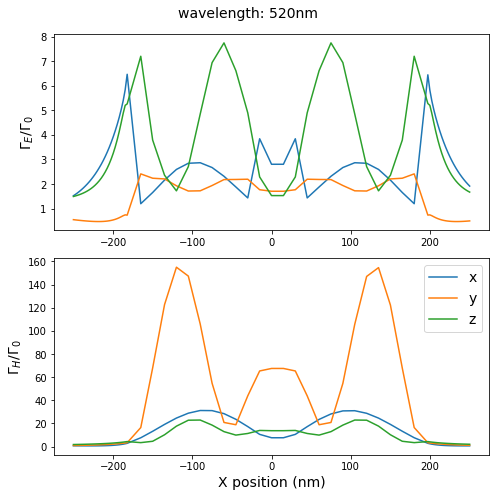

E-LDOS at wl=560.0nm - K: 5.6s, source-zone (24/74 pos): 0.0s, Q: 0.0s, S: 0.0s, integrate: 1.9s, Done in 7.5s
H-LDOS at wl=560.0nm - K: 4.9s, Q: 0.0s, S: 0.0s, integrate: 2.5s, Done in 7.5s


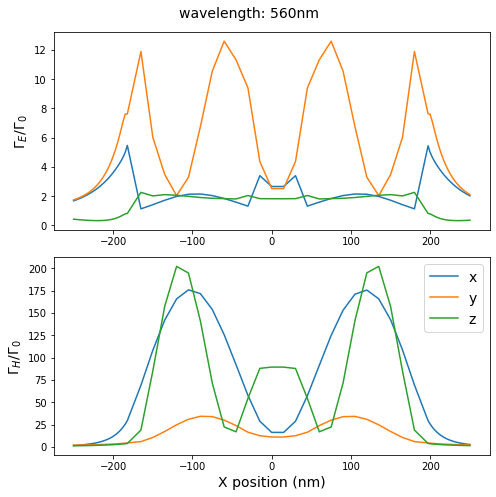

E-LDOS at wl=650.0nm - K: 3.8s, source-zone (24/74 pos): 0.0s, Q: 0.0s, S: 0.0s, integrate: 1.8s, Done in 5.7s
H-LDOS at wl=650.0nm - K: 3.6s, Q: 0.0s, S: 0.0s, integrate: 2.8s, Done in 6.4s


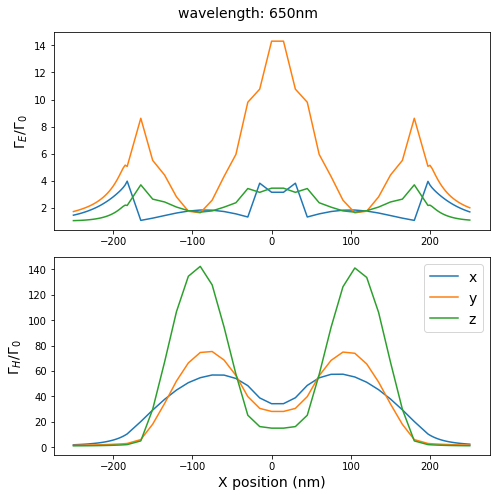

E-LDOS at wl=790.0nm - K: 4.8s, source-zone (24/74 pos): 0.0s, Q: 0.0s, S: 0.0s, integrate: 1.7s, Done in 6.6s
H-LDOS at wl=790.0nm - K: 4.1s, Q: 0.0s, S: 0.0s, integrate: 2.7s, Done in 6.8s


In [3]:
## wavelengths of peaks in the LDOS inside the low-index part
eval_wls = [
    520,  # H-1
    560,  # H-2
    650,  # E-1
    790   # H-3
    ]

## line-scan parallel to X-axis through nanostructure
N_probe = 200
r_probe = np.array([np.linspace(-250, 250, N_probe), np.zeros(N_probe), 
                    52.5 * np.ones(N_probe)]).T

## avoid formation of "stairs" at positions inside the structure:
## adapt calculation positions to mesh
r_probe = tools.adapt_map_to_structure_mesh(r_probe, sim, min_dist=1.1)


for wavelength_peak in eval_wls:
    ## --- calc. gamma along profile through structure
    gamma_profiles_E = core.decay_rate(sim, wavelength=wavelength_peak, 
                                       r_probe=r_probe, component='E', 
                                       return_value='decay_rates')
    
    gamma_profiles_M = core.decay_rate(sim, wavelength=wavelength_peak, 
                                       r_probe=r_probe, component='H', 
                                       return_value='decay_rates')
    
    ## --- plot
    plt.figure(figsize=(7,7))
    plt.suptitle('wavelength: {}nm'.format(wavelength_peak), fontsize=14)
    plt.subplot(211)
    plt.plot(r_probe.T[0], gamma_profiles_E[0].T[3], label='x')
    plt.plot(r_probe.T[0], gamma_profiles_E[1].T[3], label='y')
    plt.plot(r_probe.T[0], gamma_profiles_E[2].T[3], label='z')
    plt.ylabel("$\Gamma_E / \Gamma_0$", fontsize=14)
    
    
    plt.subplot(212)
    plt.plot(r_probe.T[0], gamma_profiles_M[0].T[3], label='x')
    plt.plot(r_probe.T[0], gamma_profiles_M[1].T[3], label='y')
    plt.plot(r_probe.T[0], gamma_profiles_M[2].T[3], label='z')
    plt.xlabel("X position (nm)", fontsize=14)
    plt.ylabel("$\Gamma_H / \Gamma_0$", fontsize=14)
    
    plt.legend(fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    